# Data Cleaning

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
# reading datasets
train_df = pd.read_json("./train_dataset.json", orient="columns")
test_df = pd.read_json("./test_dataset.json", orient="columns")
val_df = pd.read_json("./val_dataset.json", orient="columns")

df = pd.concat([train_df, val_df, test_df], axis=0)
df.head(10)

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,1000.0,producer warranty,"17"" - 17.9""",2699.0
6220,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,[no system],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0
10594,integrated graphics,"[nfc (near field communication), gps]",1920 x 1080,2,8 gb,[windows 10 professional],None,[touchpad],[SD card reader],ddr4,2.5,intel core i5,new,500.0,producer warranty,"15"" - 15.9""",2749.0
11640,integrated graphics,"[wi-fi 802.11 b/g/n/ac, bluetooth, lan 10/100/...",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7853 entries, 7233 to 1371
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       7357 non-null   object 
 1   communications          7071 non-null   object 
 2   resolution (px)         7245 non-null   object 
 3   CPU cores               7853 non-null   object 
 4   RAM size                7403 non-null   object 
 5   operating system        7203 non-null   object 
 6   drive type              7418 non-null   object 
 7   input devices           7175 non-null   object 
 8   multimedia              7145 non-null   object 
 9   RAM type                6989 non-null   object 
 10  CPU clock speed (GHz)   6917 non-null   float64
 11  CPU model               7320 non-null   object 
 12  state                   7853 non-null   object 
 13  drive memory size (GB)  7372 non-null   float64
 14  warranty                7853 non-null

In [5]:
for column in df.columns.to_list():
    if type(df[column][0])!=list:
        print(f"The unique values in the {column} are: ", df[column].unique())
        print('------------------------------------------------------------------------------------------------------------')

The unique values in the graphic card type are:  ['dedicated graphics' None 'integrated graphics']
------------------------------------------------------------------------------------------------------------
The unique values in the resolution (px) are:  ['1920 x 1080' '1366 x 768' None '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']
------------------------------------------------------------------------------------------------------------
The unique values in the CPU cores are:  ['4' '2' 'not applicable' '3' '1' '8' '6']
------------------------------------------------------------------------------------------------------------
The unique values in the RAM size are:  ['32 gb' '8 gb' None '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '256 mb' '24 gb']
------------------------------------------------------------------------------------------------------------
The unique values i

In [6]:
df.drop(columns=['state'], inplace=True)

In [7]:
df.isna().sum()

graphic card type         496
communications            782
resolution (px)           608
CPU cores                   0
RAM size                  450
operating system          650
drive type                435
input devices             678
multimedia                708
RAM type                  864
CPU clock speed (GHz)     936
CPU model                 533
drive memory size (GB)    481
warranty                    0
screen size               346
buynow_price                0
dtype: int64

In [8]:
df=df.dropna()
df.isna().sum().sum()

0

In [9]:
df.shape

(6109, 16)

In [10]:
df['resolution (px)'].unique()

array(['1920 x 1080', '1366 x 768', '2560 x 1440', '1600 x 900',
       '3840 x 2160', '1280 x 800', '3200 x 1800', '2880 x 1620',
       '1920 x 1280', '2160 x 1440', '1920 x 1200', '2560 x 1600'],
      dtype=object)

In [11]:
df['resolution_x'] = df['resolution (px)'].apply(lambda x : x.split(' x ')[0])
df['resolution_y'] = df['resolution (px)'].apply(lambda x : x.split(' x ')[1])
df['resolution_x'], df['resolution_y']

(7233    1920
 5845    1366
 5897    2560
 4870    1366
 2498    1920
         ... 
 9211    1920
 2748    1600
 2072    1920
 4741    1920
 6980    1920
 Name: resolution_x, Length: 6109, dtype: object,
 7233    1080
 5845     768
 5897    1440
 4870     768
 2498    1080
         ... 
 9211    1080
 2748     900
 2072    1080
 4741    1080
 6980    1080
 Name: resolution_y, Length: 6109, dtype: object)

In [12]:
df.drop(columns=['resolution (px)'], inplace=True)

In [13]:
df['screen size'].unique()

array(['17" - 17.9"', '15" - 15.9"', '12" - 12.9"', '14" - 14.9"',
       '13" - 13.9"', '11.9" and less'], dtype=object)

In [14]:
df['screen size'] = df['screen size'].apply(lambda x : x[:2])
df['screen size'].unique()

array(['17', '15', '12', '14', '13', '11'], dtype=object)

In [15]:
df['CPU cores'].unique()

array(['4', '2', '3', '8'], dtype=object)

In [16]:
df['RAM size'] = df['RAM size'].str.replace(' gb', '',regex=True)
df['RAM size'] = df['RAM size'].str.replace('256 mb', '0.256', regex=False)
df['RAM size'].unique()

array(['32', '8', '12', '4', '16', '2', '20', '6', '24'], dtype=object)

In [17]:
numerical_columns = ['resolution_x', 'resolution_y', 'screen size', 'CPU cores', 'RAM size', 'CPU clock speed (GHz)', 'drive memory size (GB)']
df_numeric = df[numerical_columns].astype(float)
df_numeric

,resolution_x,resolution_y,screen size,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB)
7233,1920.0,1080.0,17.0,4.0,32.0,2.6,1250.0
5845,1366.0,768.0,15.0,4.0,8.0,2.4,256.0
5897,2560.0,1440.0,12.0,4.0,8.0,1.2,256.0
4870,1366.0,768.0,15.0,2.0,8.0,2.0,1000.0
2498,1920.0,1080.0,17.0,4.0,8.0,2.4,1000.0
...,...,...,...,...,...,...,...
9211,1920.0,1080.0,15.0,4.0,32.0,2.8,500.0
2748,1600.0,900.0,17.0,4.0,8.0,2.2,1000.0
2072,1920.0,1080.0,17.0,4.0,8.0,2.6,1120.0
4741,1920.0,1080.0,15.0,4.0,12.0,2.8,1256.0


In [18]:
df['operating system']

7233                         [no system]
5845                   [windows 10 home]
5897                   [windows 10 home]
4870                   [windows 10 home]
2498    [windows 8.1 home 64-bit, other]
                      ...               
9211                   [windows 10 home]
2748                   [windows 10 home]
2072                         [no system]
4741                         [no system]
6980                   [windows 10 home]
Name: operating system, Length: 6109, dtype: object

In [19]:
df['operating system'].str.join('|')

7233                        no system
5845                  windows 10 home
5897                  windows 10 home
4870                  windows 10 home
2498    windows 8.1 home 64-bit|other
                    ...              
9211                  windows 10 home
2748                  windows 10 home
2072                        no system
4741                        no system
6980                  windows 10 home
Name: operating system, Length: 6109, dtype: object

In [20]:
# using get_dummies( ) from pandas library to convert operating system column as categories
dummies_df = df['operating system'].str.join('|').str.get_dummies()
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,windows 8.1 professional 64-bit
7233,1,0,0,0,0,0,0,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,0
4870,0,0,1,0,0,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,0


In [21]:
# apply same logic to other suitable variables
dummy_cols = ['drive type', 'RAM type', 'CPU model']
for col in dummy_cols:
    col_dummies_df = df[col].str.get_dummies()
    dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)
    
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
dummies_df.columns

Index(['no system', 'other', 'windows 10 home', 'windows 10 professional',
       'windows 7 home 64-bit', 'windows 7 professional 32-bit',
       'windows 7 professional 64-bit', 'windows 8.1 home 32-bit',
       'windows 8.1 home 64-bit', 'windows 8.1 professional 32-bit',
       'windows 8.1 professional 64-bit', 'emmc', 'hdd', 'hybrid', 'ssd',
       'ssd + hdd', 'ddr3', 'ddr3l', 'ddr4', 'amd a10', 'amd a12', 'amd a4',
       'amd a6', 'amd a8', 'amd e1', 'intel celeron ',
       'intel celeron dual-core', 'intel celeron m',
       'intel celeron quad core ', 'intel core i3', 'intel core i5',
       'intel core i7', 'intel core m', 'intel pentium dual-core',
       'intel pentium quad-core ', 'other CPU'],
      dtype='object')

In [23]:
# encode them
categorical_df = pd.get_dummies(df[['graphic card type', 'warranty']])
categorical_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,1,0,1,0
5845,1,0,0,1
5897,0,1,1,0
4870,0,1,1,0
2498,1,0,1,0
...,...,...,...,...
9211,1,0,1,0
2748,1,0,0,1
2072,1,0,1,0
4741,1,0,1,0


In [24]:
multivalue_columns = []
for column in df.columns.to_list():
    if type(df[column][0])==list and column != 'operating system':
        multivalue_columns.append(column)
multivalue_columns

['communications', 'input devices', 'multimedia']

In [25]:
# use to_list( ) function to split lists into columns
# example of to_list( ) function of pandas
pd.DataFrame(df['communications'].to_list())

,0,1,2,3,4,5
0,bluetooth,lan 10/100/1000 mbps,None,None,None,None
1,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
2,wi-fi,bluetooth,None,None,None,None
3,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
4,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
...,...,...,...,...,...,...
6104,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6105,bluetooth,lan 10/100 mbps,None,None,None,None
6106,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6107,bluetooth,lan 10/100 mbps,None,None,None,None


In [26]:
# get unique values of each features in our predefined lists 
# and convert them to new feature names

def get_unique_vals(col_name):
    #to_list function splits each comma separated value to a new column   
    col_df = pd.DataFrame(df[col_name].to_list())
    unique_vals = list()
    for col in col_df.columns.to_list():
        unique_vals += [val for val in list(col_df[col].unique()) if (val not in unique_vals and val is not None) ]

    return unique_vals

In [27]:
multivalue_dict = {col: [] for  col in multivalue_columns}

# apply get_unique_vals to all compact_cols
# search through the dataframe and add a feature to unique_vals list when it is not included before
for col in multivalue_columns:
    multivalue_dict[col] = get_unique_vals(col)

In [28]:
multivalue_dict

{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers']}

In [29]:
# put unique_vals to compact_df columns
unique_cols = list()
for col in multivalue_columns:
    unique_cols += multivalue_dict[col]
multivalue_df = pd.DataFrame(columns = unique_cols , index=df.index, data=np.zeros((df.shape[0], len(unique_cols))))
multivalue_df 

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# get the values of compact_df from original dataframe
# If the computer includes the column name as a feature assign 1, otherwise 0
for col, unique_list in multivalue_dict.items():
    for unique in unique_list:
        multivalue_df[unique] = df[col].apply(lambda x: 1 if unique in x else 0)

multivalue_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
5897,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4870,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2498,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2748,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2072,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
4741,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1


In [31]:
# concatenate all processed dataframe to put together
new_df = pd.concat([categorical_df, df_numeric, multivalue_df, dummies_df],axis=1)
new_df.head()

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,resolution_x,resolution_y,screen size,CPU cores,RAM size,CPU clock speed (GHz),...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,1,0,1920.0,1080.0,17.0,4.0,32.0,2.6,...,0,0,0,0,0,1,0,0,0,0
5845,1,0,0,1,1366.0,768.0,15.0,4.0,8.0,2.4,...,0,0,0,0,0,1,0,0,0,0
5897,0,1,1,0,2560.0,1440.0,12.0,4.0,8.0,1.2,...,0,0,0,0,0,0,0,0,0,1
4870,0,1,1,0,1366.0,768.0,15.0,2.0,8.0,2.0,...,0,0,0,1,0,0,0,0,0,0
2498,1,0,1,0,1920.0,1080.0,17.0,4.0,8.0,2.4,...,0,0,0,0,0,1,0,0,0,0


In [32]:
target_price = df['buynow_price']
target_price.head()

7233    4999.0
5845    2649.0
5897    4499.0
4870    2099.0
2498    2699.0
Name: buynow_price, dtype: float64

In [33]:
df_clean = pd.concat([new_df,target_price], axis=1)
df_clean.head()

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,resolution_x,resolution_y,screen size,CPU cores,RAM size,CPU clock speed (GHz),...,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU,buynow_price
7233,1,0,1,0,1920.0,1080.0,17.0,4.0,32.0,2.6,...,0,0,0,0,1,0,0,0,0,4999.0
5845,1,0,0,1,1366.0,768.0,15.0,4.0,8.0,2.4,...,0,0,0,0,1,0,0,0,0,2649.0
5897,0,1,1,0,2560.0,1440.0,12.0,4.0,8.0,1.2,...,0,0,0,0,0,0,0,0,1,4499.0
4870,0,1,1,0,1366.0,768.0,15.0,2.0,8.0,2.0,...,0,0,1,0,0,0,0,0,0,2099.0
2498,1,0,1,0,1920.0,1080.0,17.0,4.0,8.0,2.4,...,0,0,0,0,1,0,0,0,0,2699.0


# EDA

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6109 entries, 7233 to 6980
Data columns (total 69 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   graphic card type_dedicated graphics   6109 non-null   uint8  
 1   graphic card type_integrated graphics  6109 non-null   uint8  
 2   warranty_producer warranty             6109 non-null   uint8  
 3   warranty_seller warranty               6109 non-null   uint8  
 4   resolution_x                           6109 non-null   float64
 5   resolution_y                           6109 non-null   float64
 6   screen size                            6109 non-null   float64
 7   CPU cores                              6109 non-null   float64
 8   RAM size                               6109 non-null   float64
 9   CPU clock speed (GHz)                  6109 non-null   float64
 10  drive memory size (GB)                 6109 non-null   float64
 11  b

In [35]:
df_clean.describe()

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,resolution_x,resolution_y,screen size,CPU cores,RAM size,CPU clock speed (GHz),...,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU,buynow_price
count,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,...,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000
mean,0.615322,0.384678,0.838271,0.161729,1797.223768,1011.268620,14.985759,2.786217,10.141103,2.350604,...,0.000982,0.003601,0.196104,0.360615,0.324767,0.001146,0.026355,0.009985,0.005074,3569.637144
std,0.486559,0.486559,0.368232,0.368232,382.496546,215.407485,1.002597,0.974360,6.566799,0.377795,...,0.031327,0.059907,0.397081,0.480218,0.468326,0.033834,0.160200,0.099434,0.071060,1672.614207
min,0.000000,0.000000,0.000000,0.000000,1280.000000,768.000000,11.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,429.000000
25%,0.000000,0.000000,1.000000,0.000000,1366.000000,768.000000,15.000000,2.000000,8.000000,2.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2309.000000
50%,1.000000,0.000000,1.000000,0.000000,1920.000000,1080.000000,15.000000,2.000000,8.000000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3269.000000
75%,1.000000,1.000000,1.000000,0.000000,1920.000000,1080.000000,15.000000,4.000000,12.000000,2.600000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4499.000000
max,1.000000,1.000000,1.000000,1.000000,3840.000000,2160.000000,17.000000,8.000000,32.000000,3.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15472.650000


In [36]:
df_X = df_clean.drop(columns=['buynow_price'])
df_X.reset_index(drop = True, inplace =True)
df_X.head()

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,resolution_x,resolution_y,screen size,CPU cores,RAM size,CPU clock speed (GHz),...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
0,1,0,1,0,1920.0,1080.0,17.0,4.0,32.0,2.6,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,1366.0,768.0,15.0,4.0,8.0,2.4,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,2560.0,1440.0,12.0,4.0,8.0,1.2,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,1366.0,768.0,15.0,2.0,8.0,2.0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,1920.0,1080.0,17.0,4.0,8.0,2.4,...,0,0,0,0,0,1,0,0,0,0


In [37]:
df_y = df_clean['buynow_price']
df_y.reset_index(drop = True, inplace =True)
df_y.head()

0    4999.0
1    2649.0
2    4499.0
3    2099.0
4    2699.0
Name: buynow_price, dtype: float64

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# compute VIF score with variance_inflation_factor() function
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df_X[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [39]:
# apply VIF computation to all columns
features = df_X.columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,windows 7 home 64-bit,1.027793
1,windows 8.1 professional 32-bit,1.032274
2,windows 7 professional 32-bit,1.038891
3,wi-fi 802.11 a/b/g/n,1.074409
4,wi-fi 802.11 a/b/g/n/ac,1.120751
...,...,...
63,warranty_seller warranty,inf
64,warranty_producer warranty,inf
65,graphic card type_integrated graphics,inf
66,amd a12,inf


In [40]:
# drop with highest vif score until all vif scores are under 20
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("Removing", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 10]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

Removing other CPU
Removing graphic card type_dedicated graphics
Removing ssd
Removing ddr3
Removing warranty_producer warranty
Removing resolution_x
Removing touchpad
Removing screen size
Removing camera
Removing CPU clock speed (GHz)
Removing windows 10 home
Removing keyboard
Removing intel core i7
Removing bluetooth
Removing CPU cores
Removing microphone
Removing resolution_y
Removing speakers
Removing SD card reader


,feature,VIF
0,windows 8.1 professional 32-bit,1.004092
1,windows 7 home 64-bit,1.006844
2,intel celeron m,1.016842
3,windows 7 professional 32-bit,1.021402
4,windows 8.1 home 32-bit,1.027119
5,intel core m,1.027304
6,amd a4,1.034435
7,amd e1,1.042348
8,amd a10,1.044293
9,amd a8,1.065520


# Deep Learning Regression Modelling

In [41]:
X = df_X[selected_features]
y = df_y
print(X.shape, y.shape)

(6109, 49) (6109,)


In [42]:
# converting to numpy array
X = np.array(X)
y = np.array(y)

In [70]:
# importing modules for normalizarion and data partitioning
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [44]:
# splitting into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=3071968)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4887, 49) (1222, 49) (4887,) (1222,)


In [83]:
# applying MaxAbs scaler to normalize the data
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [84]:
# importing the neural net modules
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [95]:
# building the DNN model
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               6400      
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                

In [96]:
# compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [97]:
# defining early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=20, # you can choose a big value!
                   restore_best_weights = True) # don't forget this! otherwise it's potentially suboptimal weights

In [98]:
# fitting the model

# Setting seed for reproducibility
np.random.seed(964)
tf.random.set_seed(964)

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=6000,
                    batch_size=32,
                    shuffle=True,
                    verbose=1)

Epoch 1/6000
153/153 [==============================] - 3s 9ms/step - loss: 12994990.0000 - mae: 3235.5122 - val_loss: 6440819.5000 - val_mae: 2254.5491
Epoch 2/6000
153/153 [==============================] - 1s 6ms/step - loss: 2314110.5000 - mae: 1140.0503 - val_loss: 722570.1875 - val_mae: 592.0791
Epoch 3/6000
153/153 [==============================] - 1s 7ms/step - loss: 945442.7500 - mae: 681.2664 - val_loss: 640928.2500 - val_mae: 560.6681
Epoch 4/6000
153/153 [==============================] - 1s 7ms/step - loss: 872540.7500 - mae: 639.0083 - val_loss: 609880.7500 - val_mae: 541.6166
Epoch 5/6000
153/153 [==============================] - 1s 7ms/step - loss: 844657.2500 - mae: 631.2918 - val_loss: 598508.8750 - val_mae: 534.4665
Epoch 6/6000
153/153 [==============================] - 1s 7ms/step - loss: 790185.4375 - mae: 608.2919 - val_loss: 583451.8750 - val_mae: 530.6062
Epoch 7/6000
153/153 [==============================] - 1s 7ms/step - loss: 809058.8750 - mae: 620.7062 -

Epoch 56/6000
153/153 [==============================] - 1s 6ms/step - loss: 652088.5000 - mae: 542.5765 - val_loss: 476130.0312 - val_mae: 454.3757
Epoch 57/6000
153/153 [==============================] - 1s 7ms/step - loss: 641795.2500 - mae: 539.2398 - val_loss: 466955.0625 - val_mae: 462.2467
Epoch 58/6000
153/153 [==============================] - 1s 6ms/step - loss: 622303.2500 - mae: 531.8823 - val_loss: 462795.4062 - val_mae: 457.7461
Epoch 59/6000
153/153 [==============================] - 1s 7ms/step - loss: 636607.8750 - mae: 532.8317 - val_loss: 465975.5000 - val_mae: 454.7843
Epoch 60/6000
153/153 [==============================] - 1s 6ms/step - loss: 625153.0000 - mae: 533.9212 - val_loss: 468968.6875 - val_mae: 453.4666
Epoch 61/6000
153/153 [==============================] - 1s 7ms/step - loss: 624457.4375 - mae: 531.2360 - val_loss: 460372.5312 - val_mae: 446.9147
Epoch 62/6000
153/153 [==============================] - 1s 6ms/step - loss: 660929.3750 - mae: 540.8176 -

Epoch 111/6000
153/153 [==============================] - 1s 6ms/step - loss: 607361.1250 - mae: 520.4227 - val_loss: 456202.0625 - val_mae: 431.5264
Epoch 112/6000
153/153 [==============================] - 1s 6ms/step - loss: 579174.6250 - mae: 515.0145 - val_loss: 458130.5000 - val_mae: 432.4622
Epoch 113/6000
153/153 [==============================] - 1s 7ms/step - loss: 602422.3750 - mae: 515.8229 - val_loss: 425333.3438 - val_mae: 436.7431
Epoch 114/6000
153/153 [==============================] - 1s 7ms/step - loss: 588291.0625 - mae: 517.0071 - val_loss: 424729.7500 - val_mae: 429.4454
Epoch 115/6000
153/153 [==============================] - 1s 6ms/step - loss: 599956.3125 - mae: 508.3574 - val_loss: 421622.8438 - val_mae: 424.1861
Epoch 116/6000
153/153 [==============================] - 1s 6ms/step - loss: 586546.1250 - mae: 518.9947 - val_loss: 427110.1562 - val_mae: 426.0305
Epoch 117/6000
153/153 [==============================] - 1s 7ms/step - loss: 586966.9375 - mae: 517

153/153 [==============================] - 1s 6ms/step - loss: 588785.6250 - mae: 506.6635 - val_loss: 458939.7188 - val_mae: 425.9059
Epoch 166/6000
153/153 [==============================] - 1s 7ms/step - loss: 578909.5625 - mae: 504.3305 - val_loss: 406698.6562 - val_mae: 412.7505
Epoch 167/6000
153/153 [==============================] - 1s 6ms/step - loss: 570352.5000 - mae: 503.0279 - val_loss: 438558.6250 - val_mae: 418.7621
Epoch 168/6000
153/153 [==============================] - 1s 6ms/step - loss: 546772.8750 - mae: 499.7973 - val_loss: 418012.6875 - val_mae: 417.4993
Epoch 169/6000
153/153 [==============================] - 1s 7ms/step - loss: 554399.1250 - mae: 504.4125 - val_loss: 405920.2500 - val_mae: 420.1464
Epoch 170/6000
153/153 [==============================] - 1s 6ms/step - loss: 542693.9375 - mae: 491.9600 - val_loss: 410240.3750 - val_mae: 424.5875
Epoch 171/6000
153/153 [==============================] - 1s 7ms/step - loss: 587908.8125 - mae: 504.2997 - val_los

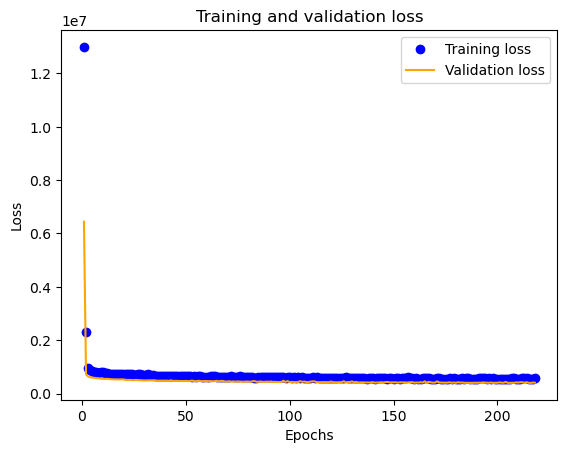

In [99]:
# plotting the training and validation accuracy by epoch
from matplotlib import pyplot as plt
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

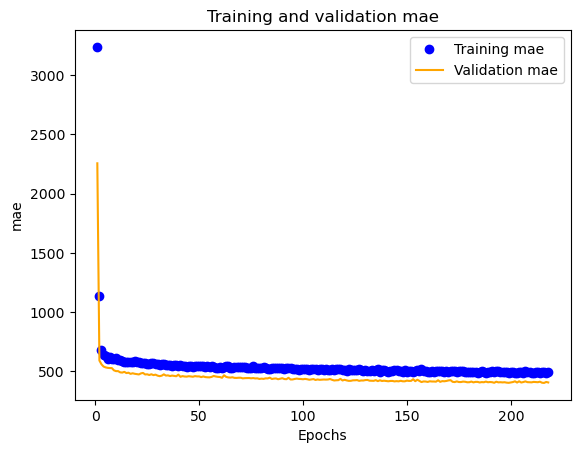

In [100]:
# plotting the training and validation mae by epoch
plt.clf()
history_dict = history.history
loss_values = history_dict['mae']
val_loss_values = history_dict['val_mae']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

39/39 [==============================] - 0s 6ms/step


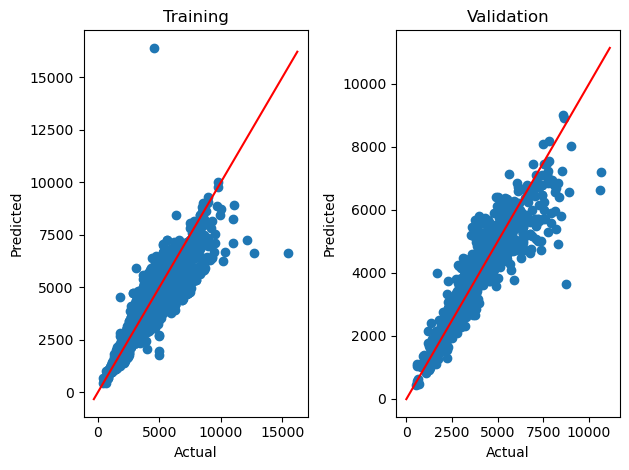

In [101]:
# scatterplot of actual vs. pred
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [102]:
# predicting using the DNN model
pred = model.predict(X_test)
pred
trainpreds = model.predict(X_train)

# importing the regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, trainpreds)
mae_test = mean_absolute_error(y_test, pred)

# Root Mean Squared Error (RMSE)
rmse_train = mean_squared_error(y_train, trainpreds, squared=False)
rmse_test = mean_squared_error(y_test, pred, squared=False)

# R-squared (R2) Score
r2_train = r2_score(y_train, trainpreds)
r2_test = r2_score(y_test, pred)

print("Training Metrics:")
print("MAE:", mae_train)
print("RMSE:", rmse_train)
print("R2 Score:", r2_train)

print("\nValidation Metrics:")
print("MAE:", mae_test)
print("RMSE:", rmse_test)
print("R2 Score:", r2_test)

153/153 [==============================] - 0s 3ms/step
Training Metrics:
MAE: 371.59382017731593
RMSE: 616.5060220437581
R2 Score: 0.8631449852017993

Validation Metrics:
MAE: 405.8760625081913
RMSE: 630.6007155535426
R2 Score: 0.8616169074585096


In [103]:
# fiiting  a random forest classifier on train data
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=964)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=964)

In [104]:
# Performing permutation importance to determine important features
from sklearn.inspection import permutation_importance


result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=964, n_jobs=2
)

# Storing the feature importance values of X variables in a pandas series
forest_importances = pd.Series(result.importances_mean, index=df_X[selected_features].columns)

In [105]:
# Print the importance values for each feature
for feature, importance in forest_importances.items():
    print(f"{feature}: {importance:.4f}")

windows 8.1 professional 32-bit: 0.0000
windows 7 home 64-bit: 0.0000
intel celeron m: -0.0000
windows 7 professional 32-bit: 0.0000
windows 8.1 home 32-bit: -0.0000
intel core m: 0.0002
amd a4: 0.0010
amd e1: 0.0004
amd a10: 0.0000
amd a8: 0.0003
amd a12: 0.0000
wi-fi 802.11 a/b/g/n: -0.0000
windows 8.1 professional 64-bit: 0.0000
hybrid: 0.0002
wi-fi 802.11 b/g/n: 0.0000
intel celeron quad core : 0.0000
wi-fi 802.11 a/b/g/n/ac: 0.0004
intel pentium quad-core : 0.0004
wi-fi 802.11 b/g/n/ac: 0.0006
intel celeron : 0.0001
emmc: 0.0000
windows 8.1 home 64-bit: 0.0000
amd a6: 0.0011
intel celeron dual-core: 0.0008
windows 7 professional 64-bit: 0.0002
intel pentium dual-core: 0.0004
other: 0.0017
no system: 0.0236
ddr3l: 0.0024
windows 10 professional: 0.0859
modem 4g (lte): 0.0122
gps: 0.0032
warranty_seller warranty: 0.0139
intel core i5: 0.1244
intel core i3: 0.1694
graphic card type_integrated graphics: 0.0424
hdd: 0.0558
ssd + hdd: 0.0039
illuminated keyboard: 0.3320
wi-fi: 0.0320
la

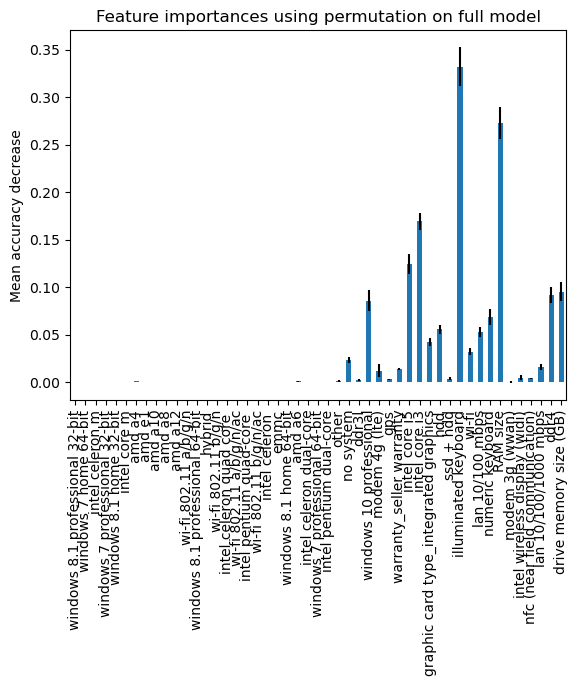

In [106]:
# Plotting the feature importance values of X varibales
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
# fig.tight_layout()
plt.show()

In [107]:
# Create a list of variables with importance greater than 0.05
important_features = forest_importances[forest_importances > 0.05].index.tolist()
print("Important features with importance greater than 0.05:", important_features)
len(important_features)

Important features with importance greater than 0.05: ['windows 10 professional', 'intel core i5', 'intel core i3', 'hdd', 'illuminated keyboard', 'lan 10/100 mbps', 'numeric keyboard', 'RAM size', 'ddr4', 'drive memory size (GB)']


10

In [109]:
X = df_X[important_features]
y = df_y
print(X.shape, y.shape)

(6109, 10) (6109,)


In [110]:
# converting to numpy array
X = np.array(X)
y = np.array(y)

In [111]:
# splitting into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=3071968)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4887, 10) (1222, 10) (4887,) (1222,)


In [112]:
# applying standard scaler to normalize the data
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [113]:
# building the DNN model
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1408      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                

In [114]:
# compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [115]:
# defining early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=20, # you can choose a big value!
                   restore_best_weights = True) # don't forget this! otherwise it's potentially suboptimal weights

In [116]:
# fitting the model

# Setting seed for reproducibility
np.random.seed(964)
tf.random.set_seed(964)

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=6000,
                    batch_size=32,
                    shuffle=True,
                    verbose=1)

Epoch 1/6000
153/153 [==============================] - 4s 9ms/step - loss: 14251562.0000 - mae: 3412.7668 - val_loss: 10280338.0000 - val_mae: 2885.3699
Epoch 2/6000
153/153 [==============================] - 1s 6ms/step - loss: 4810695.0000 - mae: 1774.3386 - val_loss: 1110145.1250 - val_mae: 768.3520
Epoch 3/6000
153/153 [==============================] - 1s 6ms/step - loss: 1257654.2500 - mae: 796.0612 - val_loss: 810920.3750 - val_mae: 654.9905
Epoch 4/6000
153/153 [==============================] - 1s 6ms/step - loss: 1118447.8750 - mae: 749.7114 - val_loss: 759128.1875 - val_mae: 632.7316
Epoch 5/6000
153/153 [==============================] - 1s 7ms/step - loss: 1052194.6250 - mae: 731.8975 - val_loss: 729296.0000 - val_mae: 610.1595
Epoch 6/6000
153/153 [==============================] - 1s 6ms/step - loss: 999317.1250 - mae: 710.7468 - val_loss: 703434.9375 - val_mae: 603.8364
Epoch 7/6000
153/153 [==============================] - 1s 6ms/step - loss: 981790.8750 - mae: 702.7

Epoch 56/6000
153/153 [==============================] - 1s 6ms/step - loss: 819353.6250 - mae: 643.6223 - val_loss: 624581.9375 - val_mae: 549.7227
Epoch 57/6000
153/153 [==============================] - 1s 5ms/step - loss: 816784.5625 - mae: 640.8201 - val_loss: 604858.7500 - val_mae: 556.2582
Epoch 58/6000
153/153 [==============================] - 1s 6ms/step - loss: 820943.6250 - mae: 637.6168 - val_loss: 603851.9375 - val_mae: 554.1274
Epoch 59/6000
153/153 [==============================] - 1s 6ms/step - loss: 801181.8750 - mae: 632.2469 - val_loss: 604853.5000 - val_mae: 556.8117
Epoch 60/6000
153/153 [==============================] - 1s 6ms/step - loss: 807743.2500 - mae: 635.6049 - val_loss: 605708.0000 - val_mae: 551.7607
Epoch 61/6000
153/153 [==============================] - 1s 6ms/step - loss: 811889.2500 - mae: 642.1747 - val_loss: 606959.0000 - val_mae: 541.2969
Epoch 62/6000
153/153 [==============================] - 1s 6ms/step - loss: 840985.5000 - mae: 647.8201 -

Epoch 111/6000
153/153 [==============================] - 1s 6ms/step - loss: 804015.5625 - mae: 637.4767 - val_loss: 604405.5625 - val_mae: 530.5638
Epoch 112/6000
153/153 [==============================] - 1s 7ms/step - loss: 776344.5000 - mae: 631.4486 - val_loss: 598678.1875 - val_mae: 534.9260
Epoch 113/6000
153/153 [==============================] - 1s 6ms/step - loss: 789962.9375 - mae: 630.7588 - val_loss: 584710.5625 - val_mae: 548.3480
Epoch 114/6000
153/153 [==============================] - 1s 6ms/step - loss: 789794.4375 - mae: 636.9684 - val_loss: 581866.5000 - val_mae: 541.1625
Epoch 115/6000
153/153 [==============================] - 1s 7ms/step - loss: 811334.0000 - mae: 628.5117 - val_loss: 582542.0625 - val_mae: 537.3992
Epoch 116/6000
153/153 [==============================] - 1s 6ms/step - loss: 783494.1250 - mae: 627.1733 - val_loss: 588607.1875 - val_mae: 538.6823
Epoch 117/6000
153/153 [==============================] - 1s 7ms/step - loss: 805333.8125 - mae: 636

153/153 [==============================] - 1s 6ms/step - loss: 770148.5625 - mae: 623.7866 - val_loss: 609868.1250 - val_mae: 529.4203
Epoch 166/6000
153/153 [==============================] - 1s 6ms/step - loss: 769322.0625 - mae: 622.6277 - val_loss: 572066.1250 - val_mae: 537.5642
Epoch 167/6000
153/153 [==============================] - 1s 5ms/step - loss: 775544.2500 - mae: 627.6096 - val_loss: 596310.8125 - val_mae: 527.9066
Epoch 168/6000
153/153 [==============================] - 1s 6ms/step - loss: 775102.2500 - mae: 629.9480 - val_loss: 589934.8125 - val_mae: 527.0825
Epoch 169/6000
153/153 [==============================] - 1s 6ms/step - loss: 757410.9375 - mae: 619.7375 - val_loss: 574667.4375 - val_mae: 540.8027
Epoch 170/6000
153/153 [==============================] - 1s 6ms/step - loss: 758871.4375 - mae: 621.7931 - val_loss: 572923.2500 - val_mae: 537.4980
Epoch 171/6000
153/153 [==============================] - 1s 6ms/step - loss: 815093.0625 - mae: 637.6450 - val_los

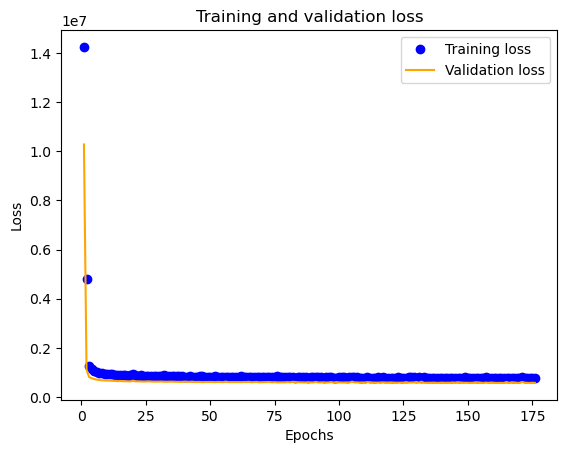

In [117]:
# plotting the training and validation accuracy by epoch
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

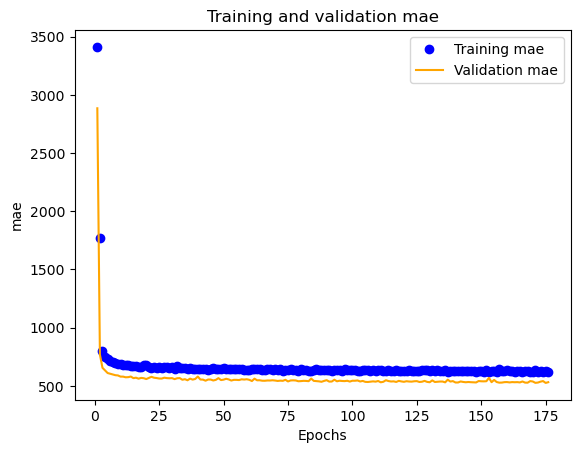

In [118]:
# plotting the training and validation mae by epoch
plt.clf()
history_dict = history.history
loss_values = history_dict['mae']
val_loss_values = history_dict['val_mae']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

39/39 [==============================] - 0s 3ms/step


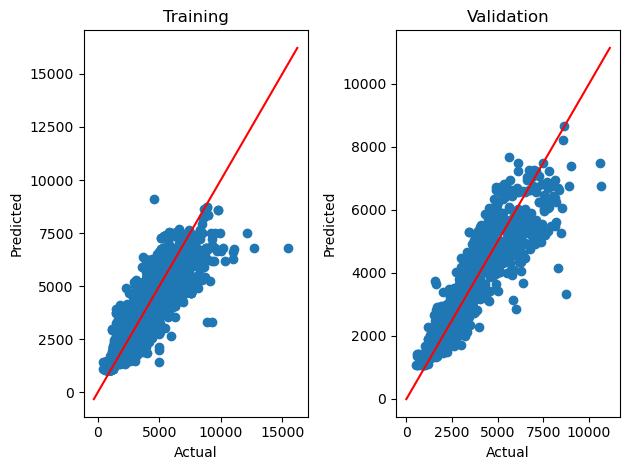

In [119]:
# scatterplot of actual vs. pred
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [120]:
# predicting using the DNN model
pred = model.predict(X_test)
pred
trainpreds = model.predict(X_train)

# importing the regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, trainpreds)
mae_test = mean_absolute_error(y_test, pred)

# Root Mean Squared Error (RMSE)
rmse_train = mean_squared_error(y_train, trainpreds, squared=False)
rmse_test = mean_squared_error(y_test, pred, squared=False)

# R-squared (R2) Score
r2_train = r2_score(y_train, trainpreds)
r2_test = r2_score(y_test, pred)

print("Training Metrics:")
print("MAE:", mae_train)
print("RMSE:", rmse_train)
print("R2 Score:", r2_train)

print("\nValidation Metrics:")
print("MAE:", mae_test)
print("RMSE:", rmse_test)
print("R2 Score:", r2_test)

153/153 [==============================] - 1s 3ms/step
Training Metrics:
MAE: 535.490411231328
RMSE: 775.201042635748
R2 Score: 0.7836211710826433

Validation Metrics:
MAE: 532.729066835394
RMSE: 755.4176089432299
R2 Score: 0.8014141401631568
